# Test Throughput

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
from matplotlib.patches import Rectangle

%matplotlib inline
import pickle
import h5py
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
sys.path.append('./lib')
from libThoughputFit import *

libThroughputFit.py :: Use atmosphtransmemullsst.__path__[0],'../data/simplegrid as the path to data
libThroughputFit.py :: data_path = /Users/dagoret/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid
SimpleAtmEmulator:path=/Users/dagoret/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid


In [4]:
#path = "../../BouguerLines/202307/dataout/MLfitsmoothGPsmoothGP-absbadremoved-2023-January-17-18-mucol.csv"
path = "dataout/throughput-2023-01-18-empty~holo4_003-psf2dffm-multifitatmparams-polar.csv"

In [5]:
th = ThrouputCut(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"])

In [6]:
th.removedbands['O3']['wl'][-1]

650.0

In [10]:
th = ThrouputParams(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"],reso=15)

In [8]:
th

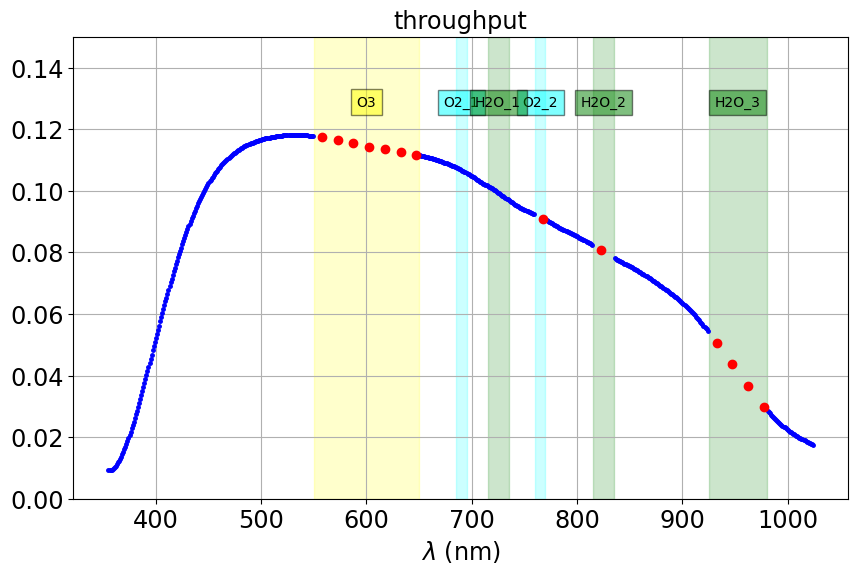

In [20]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(th.wl,th.th,'.',color="b", markersize=5)
for item in th.parambands.items():
    key = item[0]
    val = item[1]
    ax.plot(val["wl"],val["th"],'or')

the_ymin = 0
the_ymax = .15
the_yscale = the_ymax  - the_ymin 


for item in Dict_Absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.15* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=Absbands_Colors[idx_abscolor],facecolor=Absbands_Colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=Absbands_Colors[idx_abscolor], alpha=0.5))
    
ax.set_ylim(the_ymin,the_ymax)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("throughput")
ax.grid()